
#                                        Brain Tumours Detection

#### A brain tumor is a mass or growth of abnormal cells in your brain.

##### Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous
##### (malignant). Brain tumors can begin in your brain (primary brain tumors), or cancer can begin in other parts of your body and 
##### spread to your brain (secondary, or metastatic, brain tumors).

##### How quickly a brain tumor grows can vary greatly. The growth rate as well as location of a brain tumor determines how it
#### will affect the function of your nervous system.

#### Brain tumor treatment options depend on the type of brain tumor you have, as well as its size and location.

## Download the dataset of brain-mri-tumour from kaggle :-
"https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection"

In [1]:
import os

In [5]:
# directory with our training brain tumor yes images
brain_tumor_detected_dir = os.path.join("brain_tumor_dataset/yes/")

# directory with our training brain tumor no images
brain_tumor_not_detected_dir = os.path.join("brain_tumor_dataset/no/")

In [9]:
brain_tumor_detected = os.listdir(brain_tumor_detected_dir)
brain_tumor_not_detected = os.listdir(brain_tumor_not_detected_dir)

In [10]:
print(brain_tumor_detected[:10])
print(brain_tumor_not_detected[:10])

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg']
['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg', '15 no.jpg', '17 no.jpg', '18 no.jpg', '19 no.jpg']


In [11]:
print("Total images of brain_tumor_detected : ", len(os.listdir(brain_tumor_detected_dir)))
print("Total images of brain_tumor_not_detected : ", len(os.listdir(brain_tumor_not_detected_dir)))

Total images of brain_tumor_detected :  155
Total images of brain_tumor_not_detected :  98


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0


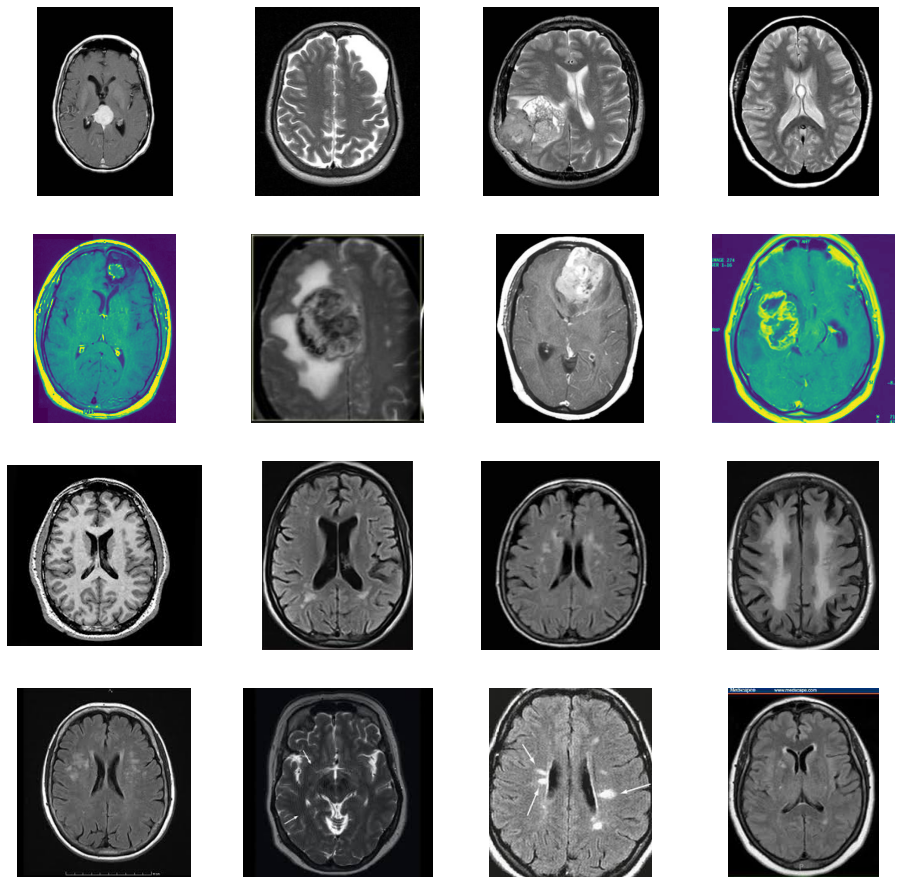

In [15]:
#Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_tumor_detected = [os.path.join(brain_tumor_detected_dir, fname) 
                for fname in brain_tumor_detected[pic_index-8:pic_index]]
next_not_tumor_detected = [os.path.join(brain_tumor_not_detected_dir, fname) 
                for fname in brain_tumor_not_detected[pic_index-8:pic_index]]

for i, img_path in enumerate(next_tumor_detected + next_not_tumor_detected):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [23]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory("brain_tumor_dataset/",
                                                   target_size=(300,300),
                                                   batch_size=32,
                                                   class_mode="binary")

Found 253 images belonging to 2 classes.


In [26]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1)

  ...
    to  
  ['...']
Train for 8 steps
Epoch 1/15
8/8 [==============================] - 14s 2s/step - loss: 0.8675 - accuracy: 0.5573
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 0.7336 - accuracy: 0.6957
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.5301 - accuracy: 0.7589
Epoch 4/15
8/8 [==============================] - 15s 2s/step - loss: 0.4900 - accuracy: 0.7984
Epoch 5/15
8/8 [==============================] - 15s 2s/step - loss: 0.4988 - accuracy: 0.7747
Epoch 6/15
8/8 [==============================] - 15s 2s/step - loss: 0.4920 - accuracy: 0.7708
Epoch 7/15
8/8 [==============================] - 18s 2s/step - loss: 0.3804 - accuracy: 0.8379
Epoch 8/15
8/8 [==============================] - 17s 2s/step - loss: 0.3577 - accuracy: 0.8458
Epoch 9/15
8/8 [==============================] - 14s 2s/step - loss: 0.2836 - accuracy: 0.8972
Epoch 10/15
8/8 [==============================] - 16s 2s/step - loss: 0.3773 - accuracy: 0.8

In [27]:
import numpy as np
from keras.preprocessing import image

[1.]
This is Tumor.. Tumor Detected


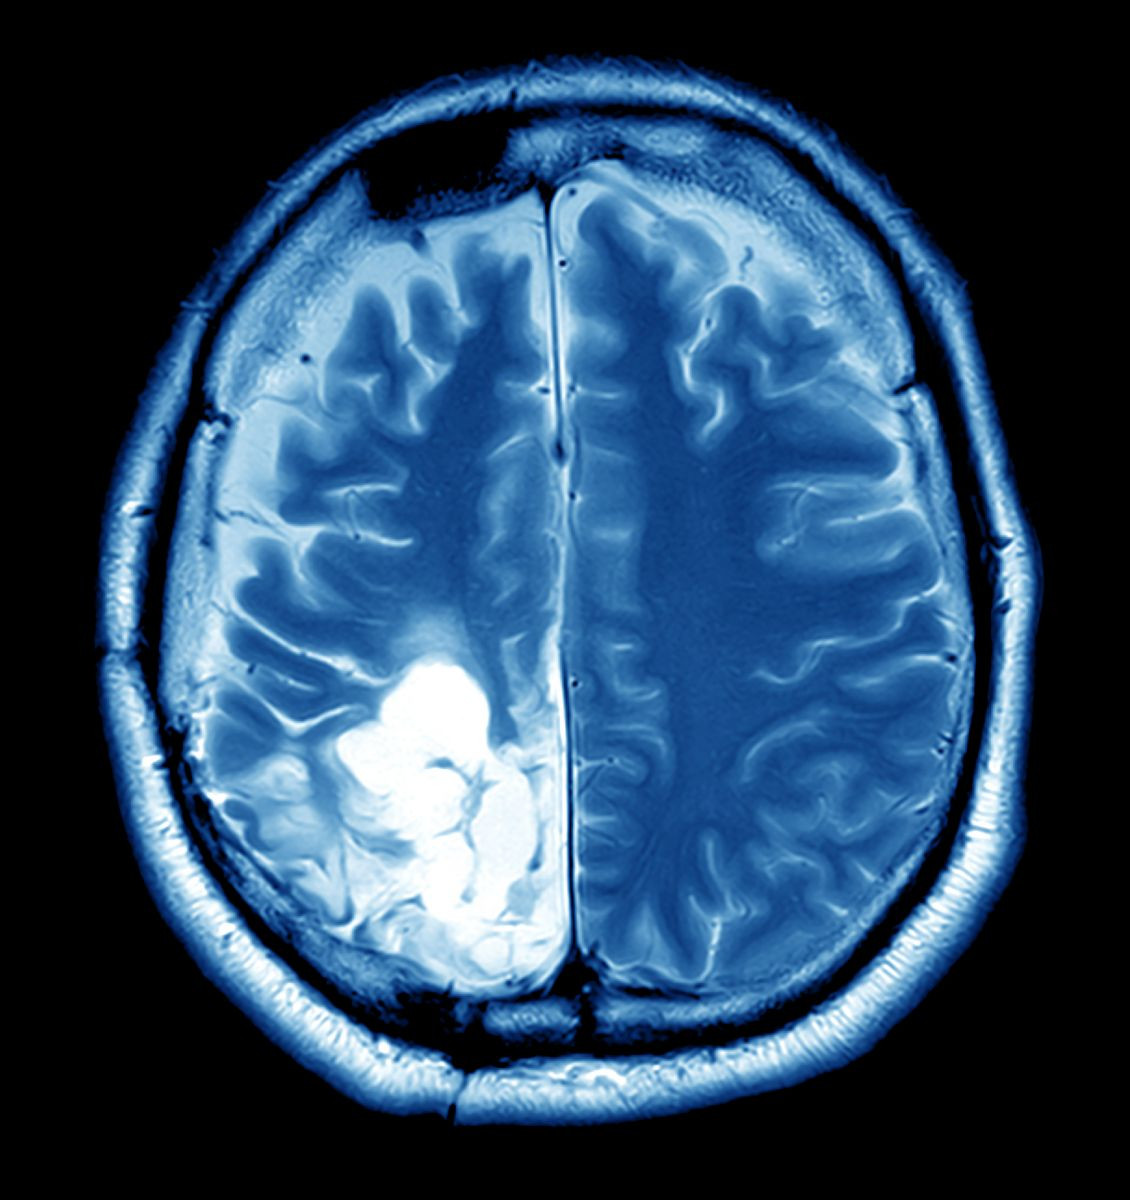

In [33]:
path = "b_y_2.jpg"

img = image.load_img(path,target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

images = np.vstack([x])

classes = model.predict(images,batch_size=10)
print(classes[0])

if classes[0] > 0.5:
    print("This is Tumor.. Tumor Detected")
else:
    print("This is not tumor.. Tumor not Detected")
    
image.load_img(path)